In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path
path = Path('data')

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_pickle(path/'train_df')
test_df = pd.read_pickle(path/'test_df')

In [4]:
# Stores in train but not in test
train_df['Store'][~train_df['Store'].isin(test_df['Store'])].unique().size

259

/Users/olegpolakow/miniconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


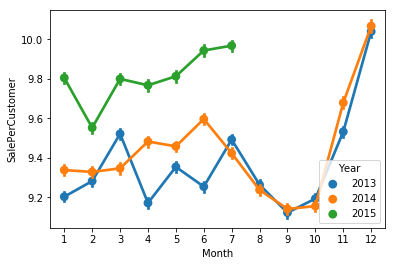

In [5]:
train_df['SalePerCustomer'] = train_df['Sales']/train_df['Customers']

sns.pointplot(x='Month', y='SalePerCustomer', hue='Year', data=train_df);

### State holidays

In [6]:
train_df['StateHoliday'].value_counts(normalize=True)

False    0.998922
True     0.001078
Name: StateHoliday, dtype: float64

In [7]:
test_df['StateHoliday'].value_counts(normalize=True)

False    0.999259
True     0.000741
Name: StateHoliday, dtype: float64

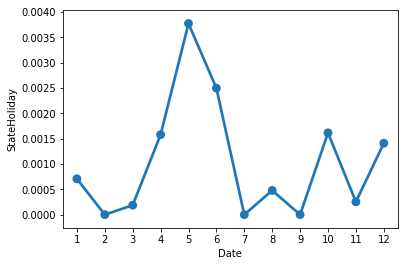

In [8]:
grouped = train_df.groupby(train_df.Date.dt.month)['StateHoliday'].mean().reset_index()

sns.pointplot(x='Date', y='StateHoliday', data=grouped)

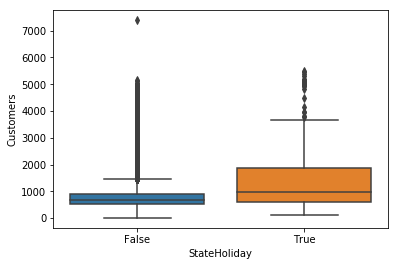

In [9]:
sns.boxplot(x='StateHoliday', y='Customers', data=train_df);

### School holidays

In [10]:
train_df['SchoolHoliday'].value_counts(normalize=True)

False    0.806422
True     0.193578
Name: SchoolHoliday, dtype: float64

In [11]:
test_df['SchoolHoliday'].value_counts(normalize=True)

True     0.500541
False    0.499459
Name: SchoolHoliday, dtype: float64

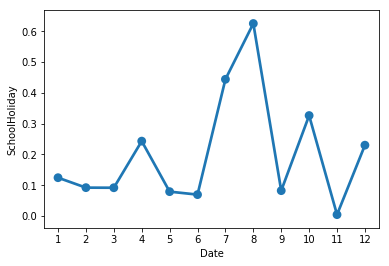

In [12]:
grouped = train_df.groupby(train_df.Date.dt.month)['SchoolHoliday'].mean().reset_index()

sns.pointplot(x='Date', y='SchoolHoliday', data=grouped)

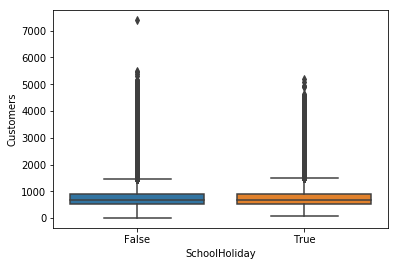

In [13]:
sns.boxplot(x='SchoolHoliday', y='Customers', data=train_df);

### Promos

In [14]:
train_df['Promo'].value_counts(normalize=True)

False    0.553644
True     0.446356
Name: Promo, dtype: float64

In [15]:
test_df['Promo'].value_counts(normalize=True)

False    0.537033
True     0.462967
Name: Promo, dtype: float64

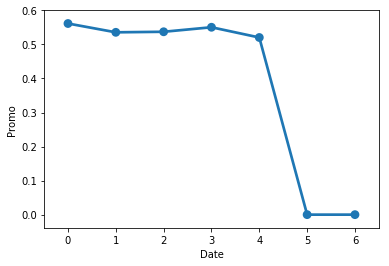

In [16]:
grouped = train_df.groupby(train_df.Date.dt.dayofweek)['Promo'].mean().reset_index()

sns.pointplot(x='Date', y='Promo', data=grouped)

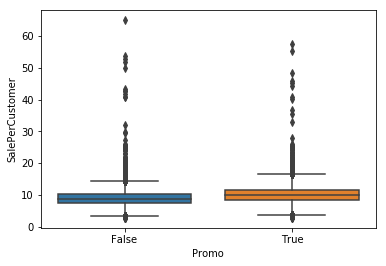

In [17]:
sns.boxplot(x='Promo', y='SalePerCustomer', data=train_df);

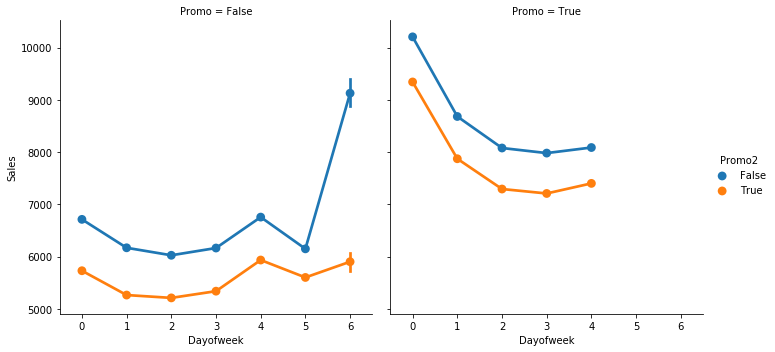

In [18]:
sns.catplot(data=train_df, x='Dayofweek', y="Sales", col='Promo', hue='Promo2', kind='point');

### Store types

In [20]:
pd.crosstab(train_df['StoreType'], train_df['Promo'], normalize=0, margins=True)

Promo,False,True
StoreType,,
a,0.552536,0.447464
b,0.618380,0.381620
c,0.550908,0.449092
d,0.552905,0.447095
All,0.553644,0.446356


In [21]:
pd.crosstab(test_df['StoreType'], test_df['Promo'], normalize=0, margins=True)

Promo,False,True
StoreType,,
a,0.536846,0.463154
b,0.604938,0.395062
c,0.534801,0.465199
d,0.534795,0.465205
All,0.537033,0.462967


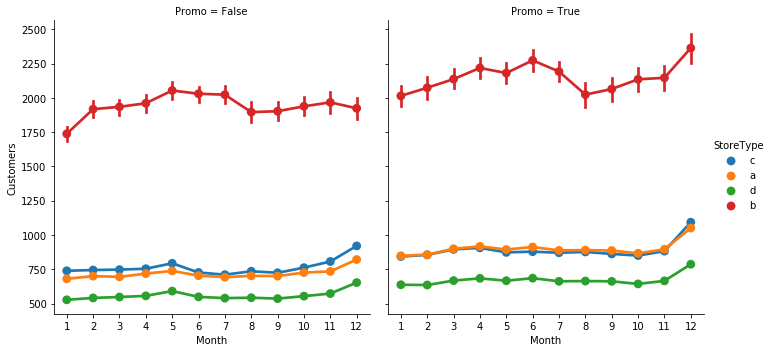

In [22]:
sns.catplot(data=train_df, x='Month', y='Customers', col='Promo', hue='StoreType', kind='point');

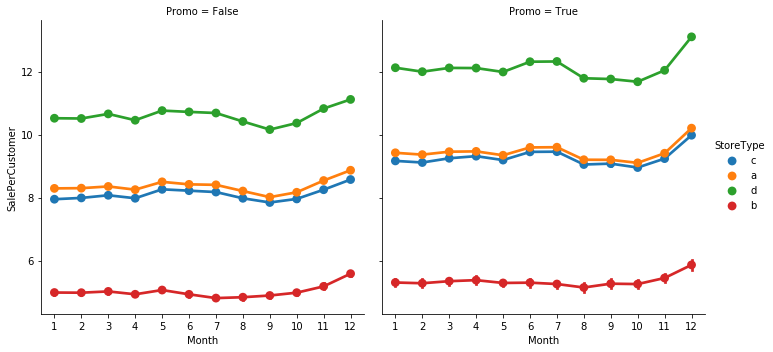

In [23]:
sns.catplot(data=train_df, x='Month', y='SalePerCustomer', col='Promo', hue='StoreType', kind='point');

### Assortment

In [24]:
pd.crosstab(test_df['StoreType'], test_df['Assortment'], normalize=0, margins=True)

Assortment,a,b,c
StoreType,,,
a,0.569010,0.000000,0.430990
b,0.169312,0.746032,0.084656
c,0.505089,0.000000,0.494911
d,0.379948,0.000000,0.620052
All,0.491312,0.012050,0.496639


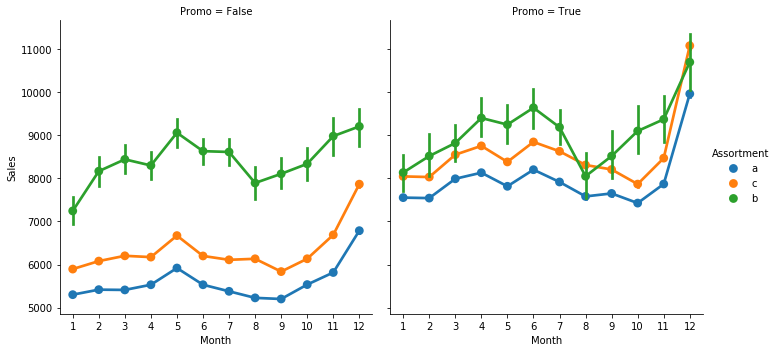

In [25]:
sns.catplot(data=train_df, x='Month', y='Sales', col='Promo', hue='Assortment', kind='point');

### Competition

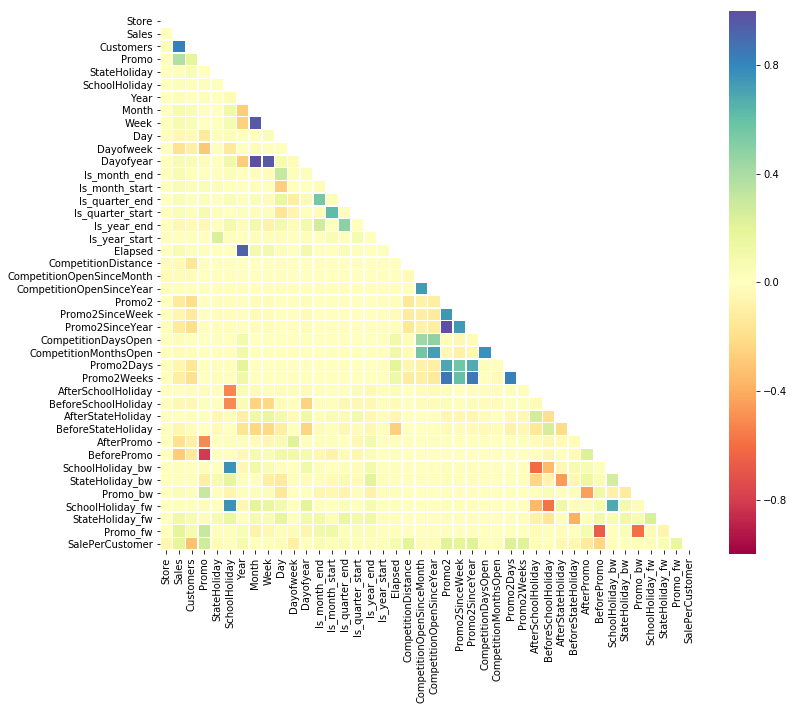

In [26]:
def plot_heatmap(df, figsize):
    # Compute the correlation matrix
    corr_all = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr_all, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_all, mask=mask, square=True, linewidths=.5, ax=ax, vmin=-1, vmax=1, cmap="Spectral")      
    plt.show()
    
# Compute the correlation matrix for store data
columns = ['Store', 'Sales', 'Customers', 'Promo',
           'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week', 'Day',
           'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
           'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
           'Elapsed', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
           'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
           'Promo2SinceYear', 'CompetitionDaysOpen', 'CompetitionMonthsOpen', 
           'Promo2Days', 'Promo2Weeks', 'AfterSchoolHoliday', 'BeforeSchoolHoliday',
           'AfterStateHoliday', 'BeforeStateHoliday', 'AfterPromo', 'BeforePromo',
           'SchoolHoliday_bw', 'StateHoliday_bw', 'Promo_bw', 'SchoolHoliday_fw',
           'StateHoliday_fw', 'Promo_fw', 'SalePerCustomer']

plot_heatmap(train_df[columns], (12, 10))

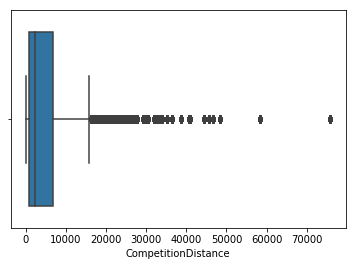

In [27]:
sns.boxplot(train_df['CompetitionDistance'].dropna());

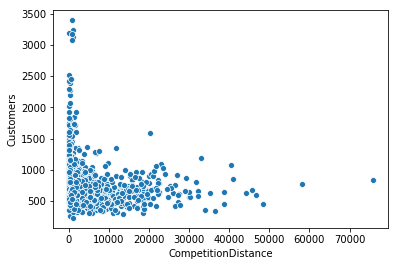

In [28]:
grouped = train_df.groupby(by='Store')[['Customers', 'CompetitionDistance']].median().reset_index()

sns.scatterplot(x='CompetitionDistance', y='Customers', data=grouped)

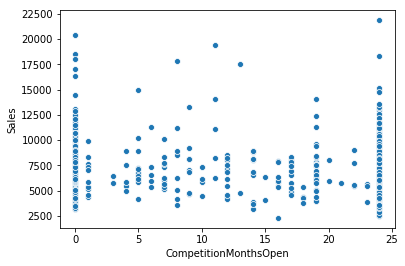

In [29]:
grouped = train_df.groupby(by='Store')[['Sales', 'CompetitionMonthsOpen']].median().reset_index()

sns.scatterplot(x='CompetitionMonthsOpen', y='Sales', data=grouped)

### Weather

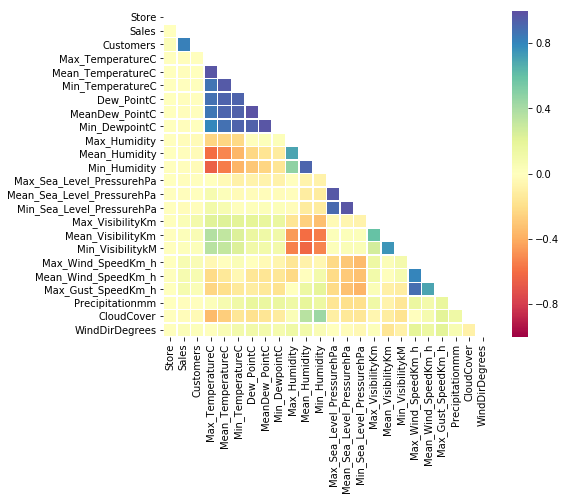

In [30]:
# Compute the correlation matrix for weather data
columns = ['Store', 'Sales', 'Customers', 'Max_TemperatureC',
           'Mean_TemperatureC', 'Min_TemperatureC', 'Dew_PointC', 'MeanDew_PointC',
           'Min_DewpointC', 'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
           'Max_Sea_Level_PressurehPa', 'Mean_Sea_Level_PressurehPa',
           'Min_Sea_Level_PressurehPa', 'Max_VisibilityKm', 'Mean_VisibilityKm',
           'Min_VisibilitykM', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h',
           'Max_Gust_SpeedKm_h', 'Precipitationmm', 'CloudCover', 'WindDirDegrees']

plot_heatmap(train_df[columns], (8, 6))

In [31]:
train_df.groupby(by='Events')['Customers'].mean()

Events
Fog                            761.476447
Fog-Rain                       779.329908
Fog-Rain-Hail                  687.337705
Fog-Rain-Hail-Thunderstorm     714.223810
Fog-Rain-Snow                  688.869364
Fog-Rain-Snow-Hail             863.430730
Fog-Rain-Thunderstorm          722.339646
Fog-Snow                       671.400781
Fog-Snow-Hail                  696.048951
Fog-Thunderstorm               796.838542
Rain                           768.449494
Rain-Hail                      883.480170
Rain-Hail-Thunderstorm         807.982478
Rain-Snow                      757.061083
Rain-Snow-Hail                 862.804768
Rain-Snow-Hail-Thunderstorm    901.149068
Rain-Snow-Thunderstorm         788.316254
Rain-Thunderstorm              751.242180
Snow                           717.375170
Snow-Hail                      776.253731
Thunderstorm                   709.415761
Name: Customers, dtype: float64

### Google Trends

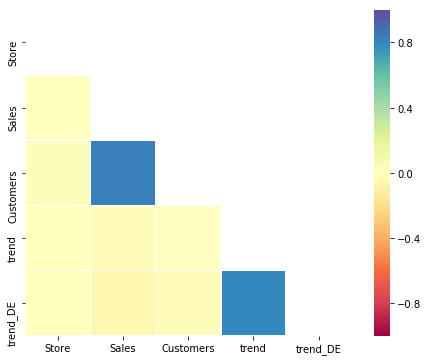

In [32]:
# Compute the correlation matrix for Google Trends data
columns = ['Store', 'Sales', 'Customers', 'trend', 'trend_DE']

plot_heatmap(train_df[columns], (8, 6))

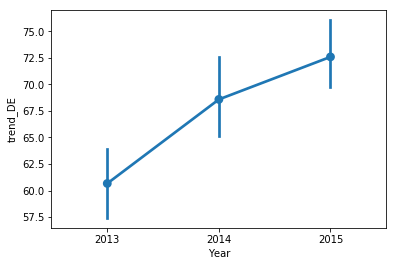

In [33]:
grouped = train_df.groupby(by=['Year', 'Month'])['trend_DE'].mean().reset_index()

sns.pointplot(x='Year', y='trend_DE', data=grouped);